# Overview of membrane modeling

In continuum membrane modeling, we are solving for the shape of the membrane given a model (defined by a set of equations and boundary conditions) and parameters (defined as additional input that must be specified into the model to get a shape. In this project, our goal is to accumulate all the different membrane models and all of the possible parameters required and 1) have a single class that stores all these models, 2) run these models against experimental shapes in an ImageJ plugin

We're storing these models in a Membrane class location in emm.membrane

In [1]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
from emm.membrane import Membrane

This is how the model is parametrized

!parameterization.png](attachment:parameterization.png)

Here, s is the arc length, r is the radius, z is the height, psi is the local tangent angle, H is the mean curvature, L is the derivative of the mean curvature and lambda is the membrane tension. We can rewrite this non dimensionally using x for radius, y for height, h for mean curvature, l for derivative of mean curvature and lambda~ for membrane tension as

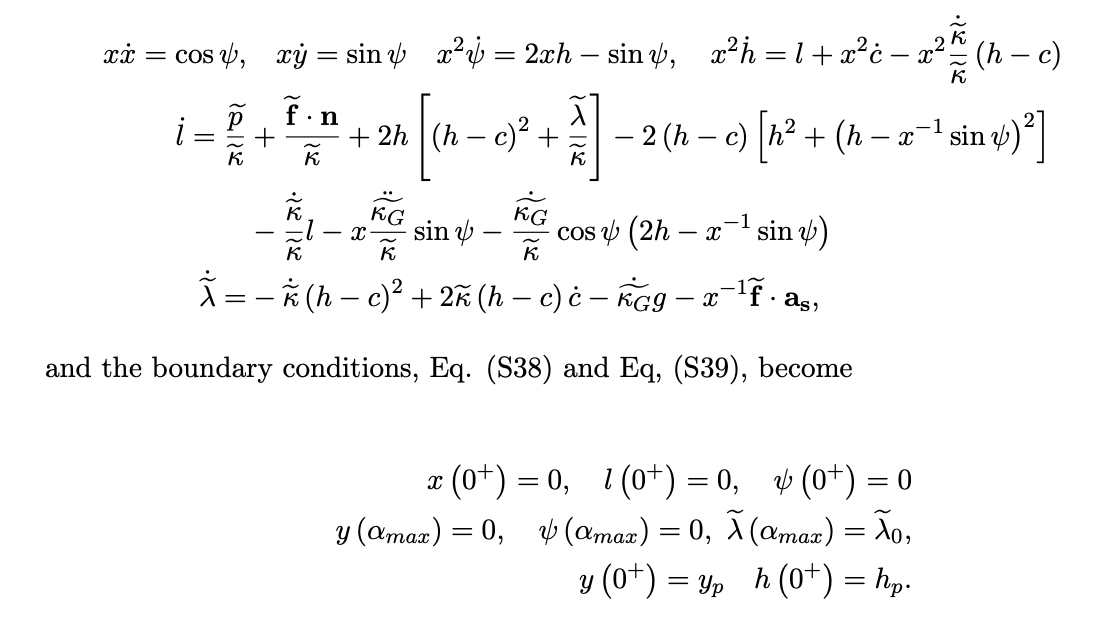

this is solved as a boundary value problem, so we also need to define boundary conditions (specified above)

Now that we have our model, we also have a bunch of parameters that we need to specify. 

Here is a list:

k -> bending rigidity

R0 -> length scale of the bud

g -> arbitrary tanh function parameter for spontaneous curvature

c0 -> spontaneous curvature

a0 -> area of spontaneous curvature

lam0 -> membrane tension

a0ut -> area of applied force along the edges

aIn -> area of applied force at the bud tip

# Specify parameters

First, lets specify some parameters

In [6]:
x = 200 *(np.linspace(0, 1, 1000))**2
k, R0, g, c0, a0, lam0, aOut, aIn = 320, 20, 20, 0.02, 12,0.002, 200, 100


# Make class instance

Let's store these in a membrane class

In [7]:
mem = Membrane(x, k, R0, g, c0, a0, lam0, aOut, aIn)

# Loop over spontaneous curvature values

Now lets vary only one of those parameters and see what we get!

In this case, lets vary c0 

In [8]:
crng = np.linspace(0, 0.035, 20)
loopsol = mem.loop_curvature_c(x, crng)

HERE
kkk
Solved in 14 iterations, number of nodes 1218. 
Maximum relative residual: 9.95e-06 
Maximum boundary residual: 0.00e+00
fun_2
True 0
kkk
Solved in 14 iterations, number of nodes 1401. 
Maximum relative residual: 9.99e-06 
Maximum boundary residual: 1.67e-34
fun_2
True 0
kkk
Solved in 14 iterations, number of nodes 1422. 
Maximum relative residual: 9.97e-06 
Maximum boundary residual: 9.31e-34
fun_2
True 0
kkk
Solved in 14 iterations, number of nodes 1450. 
Maximum relative residual: 9.99e-06 
Maximum boundary residual: 8.34e-34
fun_2
True 0
kkk
Solved in 14 iterations, number of nodes 1492. 
Maximum relative residual: 1.00e-05 
Maximum boundary residual: 1.09e-34
fun_2
True 0
kkk
Solved in 14 iterations, number of nodes 1595. 
Maximum relative residual: 1.00e-05 
Maximum boundary residual: 5.52e-33
fun_2
True 0
kkk
Solved in 14 iterations, number of nodes 1670. 
Maximum relative residual: 9.99e-06 
Maximum boundary residual: 5.83e-33
fun_2
True 0
kkk
Solved in 14 iterations, 

Now, lets plot the shapes

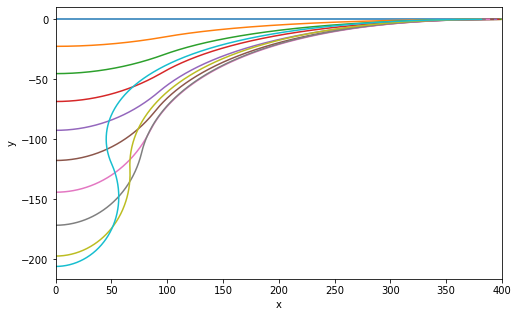

In [9]:
fig, ax = plt.subplots(1,1,figsize = (8,5))
for i in range(int(len(loopsol)/6)):
    sol = loopsol[6*i:6*(i+1), :]
    mem.plot(ax, x , sol)
ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.set(ylim = [-0.25, 0.01])
ax.set(xlim = [0, 400])
plt.show()

And there's all the model shapes! We want to do similar loops for all our parameters, get a whole range of shapes, and find a way to match those family of shapes to experiments